# Dataset: Cred Application Review

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
import gensim

from gensim import models

import seaborn as sns


wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

In [2]:
data = pd.read_csv('Cred_app_reviews.csv')
data.head(20)

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,5b98e61e-7c14-4a6e-9cd3-bbdb9d7d26d4,UI is good looking and easy to use. It's prett...,3,60,3.1.4.8,2022-10-04 00:30:35,"\nHi, Siddharth! We understand that rewards ar...",2022-10-05 16:01:09
1,860013bd-9250-413f-b51d-c0a0b449415f,Not useful anymore. This app started out as so...,2,480,3.1.3.8,2022-09-12 16:31:15,"\nHi Regina, thank you for sharing your though...",2022-09-12 16:38:52
2,e06f8a4b-ff6f-4261-8c39-4d797140086a,Good for Payments but this app is no reality. ...,3,170,3.1.4.6,2022-09-30 00:34:15,"\nHi, Sriram! Our goal is to provide our membe...",2022-10-04 16:53:36
3,865647e9-24c6-4874-9475-c3e40609baf4,Very worst customer care. No information is av...,1,178,3.1.1.5,2022-09-08 23:31:33,NaN,NaN
4,ff03e688-ed52-4684-9477-99e93013ec94,There has been some fradulent payments done on...,1,388,3.1.1.5,2022-08-16 14:25:36,"\nHi Aaryan, it’s always important for us to k...",2022-08-16 14:29:26
5,971c24c9-e812-474a-86ea-9805991dd871,"I secured my credit card, which they advertise...",1,230,3.0.9.9,2022-08-06 15:16:09,"\nHi Seshan, we shall surely assist you with t...",2022-08-06 14:19:45
6,d868776e-d20f-44a5-8e7e-2182e7d8391d,Very worst customer care. No information is av...,1,546,3.1.1.5,2022-09-02 12:06:46,"\nHi Tejaswini, we regret the inconvenience ca...",2022-09-02 12:31:55
7,60199e05-bfa7-4d6e-8ce4-c044da7f8390,One of the worst applications with respect to ...,1,196,3.0.9.9,2022-08-09 12:09:09,"\nHi Sabyasachi, we make sure our valued membe...",2022-08-09 12:15:11
8,cfe04ed8-b33f-485a-bbbf-dce44e3c7d16,Worst app ever. It deals with payments but abs...,1,31,3.1.2.4,2022-09-10 17:06:41,"\nHi Ajin, thank you for highlighting the issu...",2022-09-10 17:21:49
9,e9e70f49-5b8e-421b-8e10-9001a62595bd,Update 24-Aug-2022: It's more than 8 days and ...,1,94,3.1.1.5,2022-08-24 12:26:57,"\nHi Sam, we regret to hear about your experie...",2022-08-16 09:43:29


# Data Preprocessing

In [3]:
data.shape

(164239, 8)

In [4]:
up_data = data.drop(columns=['reviewId','thumbsUpCount','reviewCreatedVersion','at','repliedAt','replyContent'], axis=1)

In [5]:
up_data.head()

,content,score
0,UI is good looking and easy to use. It's prett...,3
1,Not useful anymore. This app started out as so...,2
2,Good for Payments but this app is no reality. ...,3
3,Very worst customer care. No information is av...,1
4,There has been some fradulent payments done on...,1


In [6]:
up_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164239 entries, 0 to 164238
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  164232 non-null  object
 1   score    164239 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


# Counting the values for the review rating

In [7]:
up_data.score.value_counts()

5    117460
1     22615
4     17478
3      3820
2      2866
Name: score, dtype: int64

C:\Users\praty\AppData\Local\Temp\ipykernel_20824\1187115005.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(up_data['score'])


<AxesSubplot: xlabel='score', ylabel='Density'>

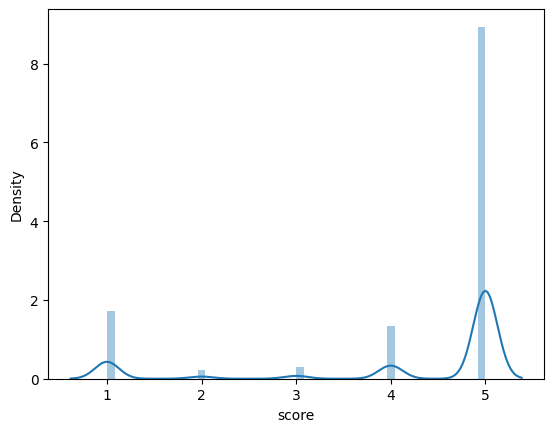

In [8]:
sns.distplot(up_data['score'])

In [9]:
up_data = up_data.dropna(subset=['content'])

# Cleaning the Data

In [10]:
up_data['clean_content'] = up_data['content'].apply(lambda x: gensim.utils.simple_preprocess(x))
up_data.head(20)


,content,score,clean_content
0,UI is good looking and easy to use. It's prett...,3,"[ui, is, good, looking, and, easy, to, use, it..."
1,Not useful anymore. This app started out as so...,2,"[not, useful, anymore, this, app, started, out..."
2,Good for Payments but this app is no reality. ...,3,"[good, for, payments, but, this, app, is, no, ..."
3,Very worst customer care. No information is av...,1,"[very, worst, customer, care, no, information,..."
4,There has been some fradulent payments done on...,1,"[there, has, been, some, fradulent, payments, ..."
5,"I secured my credit card, which they advertise...",1,"[secured, my, credit, card, which, they, adver..."
6,Very worst customer care. No information is av...,1,"[very, worst, customer, care, no, information,..."
7,One of the worst applications with respect to ...,1,"[one, of, the, worst, applications, with, resp..."
8,Worst app ever. It deals with payments but abs...,1,"[worst, app, ever, it, deals, with, payments, ..."
9,Update 24-Aug-2022: It's more than 8 days and ...,1,"[update, aug, it, more, than, days, and, cred,..."


In [11]:
def clean_text(text):
    text = " ".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

up_data['body_text_nostop'] = up_data['clean_content'].apply(lambda x: clean_text(x))



In [12]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

up_data['body_text_lemmatized'] = up_data['body_text_nostop'].apply(lambda x: lemmatizing(x))

up_data.head()

,content,score,clean_content,body_text_nostop,body_text_lemmatized
0,UI is good looking and easy to use. It's prett...,3,"[ui, is, good, looking, and, easy, to, use, it...","[ui, good, looking, easy, use, pretty, helpful...","[ui, good, looking, easy, use, pretty, helpful..."
1,Not useful anymore. This app started out as so...,2,"[not, useful, anymore, this, app, started, out...","[useful, anymore, app, started, something, cre...","[useful, anymore, app, started, something, cre..."
2,Good for Payments but this app is no reality. ...,3,"[good, for, payments, but, this, app, is, no, ...","[good, payments, app, reality, ui, amazing, ap...","[good, payment, app, reality, ui, amazing, app..."
3,Very worst customer care. No information is av...,1,"[very, worst, customer, care, no, information,...","[worst, customer, care, information, available...","[worst, customer, care, information, available..."
4,There has been some fradulent payments done on...,1,"[there, has, been, some, fradulent, payments, ...","[fradulent, payments, done, application, bank,...","[fradulent, payment, done, application, bank, ..."


# Splitting the Data into Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(up_data['body_text_lemmatized'], up_data['score'], test_size=0.25, random_state=42)

print('\nX_train size:\t',X_train.shape)
print('\nX_test size:\t',X_test.shape)
print('\ny_train size:\t',y_train.shape)
print('\ny_test size:\t',y_test.shape)


X_train size:	 (123174,)

X_test size:	 (41058,)

y_train size:	 (123174,)

y_test size:	 (41058,)


# Applying TF-IDF 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train.astype('U'))

X_test = vectorizer.transform(X_test.astype('U'))

X_train.shape, X_test.shape

((123174, 20069), (41058, 20069))

# Applying Models
# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

acc_test_lr = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {acc_test_lr}')

Test Accuracy: 0.82251936285255


c:\program files\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
lr_class = classification_report(y_test, y_pred)
print(lr_class)

              precision    recall  f1-score   support

           1       0.75      0.86      0.80      5624
           2       0.29      0.01      0.02       743
           3       0.32      0.01      0.03       942
           4       0.31      0.02      0.04      4408
           5       0.84      0.98      0.91     29341

    accuracy                           0.82     41058
   macro avg       0.50      0.38      0.36     41058
weighted avg       0.75      0.82      0.76     41058



# SVC

In [17]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()

lsvc.fit(X_train, y_train)

y_pred_test = lsvc.predict(X_test)
acc_test_svc = accuracy_score(y_test, y_pred_test)

print(f'Test Accuracy: {acc_test_svc}')

Test Accuracy: 0.81886599444688


In [18]:
svc_classi = classification_report(y_test, y_pred_test)
print(svc_classi)

              precision    recall  f1-score   support

           1       0.75      0.85      0.79      5624
           2       0.20      0.03      0.05       743
           3       0.25      0.03      0.05       942
           4       0.25      0.02      0.04      4408
           5       0.84      0.98      0.91     29341

    accuracy                           0.82     41058
   macro avg       0.46      0.38      0.37     41058
weighted avg       0.74      0.82      0.76     41058



# Results

In [19]:
print("\033[1m"+"\t\t\tResults"+"\033[0m")
print("\n"+"*"*55)
print("\033[1m"+"\tFor Logistic Regression the results are:"+"\033[0m")
print("*"*55)
print("\nTest Accuracy Score:\t", acc_test_lr)
print("Classification Report\n",lr_class)
print("\n"+"*"*55)
print("\033[1m"+"\tFor SVC the results are:"+"\033[0m")
print("*"*55)
print("\nTest Accuracy Score:\t",acc_test_svc )
print("Classification Report:\n",svc_classi)
print("*"*55)

			Results

*******************************************************
	For Logistic Regression the results are:
*******************************************************

Test Accuracy Score:	 0.82251936285255
Classification Report
               precision    recall  f1-score   support

           1       0.75      0.86      0.80      5624
           2       0.29      0.01      0.02       743
           3       0.32      0.01      0.03       942
           4       0.31      0.02      0.04      4408
           5       0.84      0.98      0.91     29341

    accuracy                           0.82     41058
   macro avg       0.50      0.38      0.36     41058
weighted avg       0.75      0.82      0.76     41058


*******************************************************
	For SVC the results are:
*******************************************************

Test Accuracy Score:	 0.81886599444688
Classification Report:
               precision    recall  f1-score   support

           1       0.75 

# Conclusion:

As per the final results, both the models that is Logistic Regression and SVC has almost close accuracy, but Logistic Regression has predicted 82.22% accurately the app rating according to the review a user has posted, whereas the SVC model has predicted the rating 81.88% accurately. Thus, Logistic Regression is better than SVC for this dataset.